# Implications of Phase Space
## Project work for reproducible and Interactive Data Analysis and Modelling using Jupyter Notebooks
> Autumn 2017

> Smita Chakraborty ([smita.chakraborty@thep.lu.se](smita.chakraborty@thep.lu.se)) 

> Department of Astronomy and Theoretical Physics. 

# What is Phase Space?

Phase space refers to the plotting of both a particle's momentum and position on a two dimensional graph. It also refers to the tracking of N particles in a 2N dimensional space. In many cases, the coordinates used are the canonical variables of Hamiltonian mechanics. If these canonical variables are used, the motion of particles in phase space exhibits properties that lead to important results in the field of thermodynamics and statistical mechanics.

Phase space can describe the orbit of one particle, or the orbits of a large number of particles. It can even be used to describe a large number of collections of N particles, where N itself is a large number. Finally phase space can be used to describe the probability distributions of how collections of N particles behave if they are allowed to exchange particles and energy with the universe.

Some properties of phase space:
• phase space is a cartesian space
• it is non-metric, that is, one cannot define invariant distances in the phase space. This is also the case for the PV -state space in thermodynamics.

As we discuss phase space, we will see the roles it plays in **classical mechanics**, **quantum mechanics** and **statistical mechanics** and how these further give way to more complex studies of chaos and cosmology. 


## Phase Space in Classical Mechanics

In classical mechanics, the best way to explore phase space is by [Hamiltonian mechanics](https://en.wikipedia.org/wiki/Hamiltonian_mechanics). 
The most elementary phase space consists of a single particle confined to one dimensional motion, under the influence of a conservative force field. Such a system can be modeled using Hamiltonian methods. A suitable Hamiltonian is the total energy, expressed as a function of position, x, and momentum, p:
\begin{align}
H(p,x)=\frac{p^2}{2m}+\phi(x)
\end{align}
where $\phi(x)$ is the potential of the system. 
From Hamiltonian mechanics, we have the equation of motion: 
\begin{align}
\frac{dx}{dt} = \frac{\partial H}{\partial p};
\frac{dp}{dt} =- \frac{\partial H}{\partial x};
\frac{dH}{dt} = \frac{\partial H}{\partial t}.
\end{align}
From which Newton's equations of motion follow: 
\begin{align}
\frac{dx}{dt}=\frac{p}{m}; 
\frac{dp}{dt}=-\frac{\partial \phi}{ \partial x};
\frac{dE}{dt}=\frac{\partial H}{\partial t}.
\end{align}

### Simple Harmonic Oscillator
The Hamiltonian of the harmonic oscillator is:
\begin{align}
H = p\dot{x}-L
= m\dot{x}^2 - (\frac{1}{2}m\dot{x}^2 - \frac{1}{2}kx^2)
= \frac{1}{2}m\dot{x}^2 + \frac{1}{2}kx^2
\end{align}
In the Hamiltonian form, the equations of motion are written in terms of coordinates and their conjugate momenta, rather than their velocities (time derivatives). For one thing, the equations become somewhat simpler, although not by much in simple expressions
\begin{align}
H(p,x)= \frac{p^2}{2m} +\frac{kx^2}{2}
\end{align}
which is the equation of an ellipse, hence we will see that the phase space plot will be an ellipse centered at the origin.  Any point on the ellipse will remain on the ellipse for all time. Both the coordinate and the momentum oscillate and the period of the oscillation is related to the frequency.

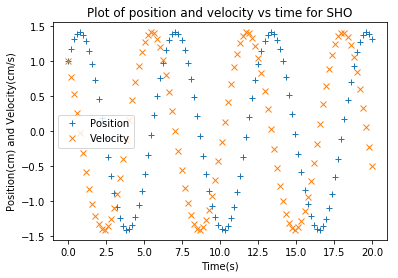

In [20]:
# simple harmonic oscillator
import numpy as np #importing required packages
import matplotlib.pyplot as plt
from scipy.integrate import odeint #package required for performing integration of ODE
a=1; #parameter definition
def dx_dt(x,t): #function performing integration
    return[x[1],-a*x[0]] #second order differential has been broken into two first order ODE
ts=np.linspace(0,20,100) #time scale to be considered and number of iterations
x0=[1.0,1.0] #initial conditions
xs=odeint(dx_dt,x0,ts)
position = xs[:,0]
velocity = xs[:,1]
plt.plot(ts,position,"+",label="Position")
plt.plot(ts,velocity,"x",label="Velocity")
plt.xlabel("Time(s)")
plt.ylabel("Position(cm) and Velocity(cm/s)")
plt.title("Plot of position and velocity vs time for SHO")
plt.legend();
plt.savefig('Plot of position and velocity vs time for SHO.png') #saving the plot
plt.show()

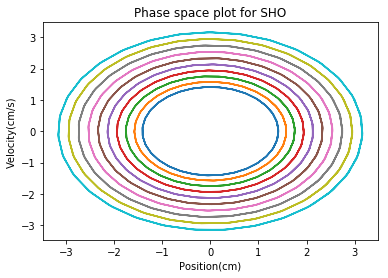

In [22]:
#phase space plot for SHO
ic=np.linspace(1.0,3.0,10) #
for r in ic:
    x0=[r,1.0]
    xs=odeint(dx_dt,x0,ts)
    plt.plot(xs[:,0],xs[:,1],"-") #plotting position vs velocity
plt.xlabel("Position(cm)")
plt.ylabel("Velocity(cm/s)")
plt.title("Phase space plot for SHO")
plt.savefig('Phase space plot for SHO.png')
plt.show()

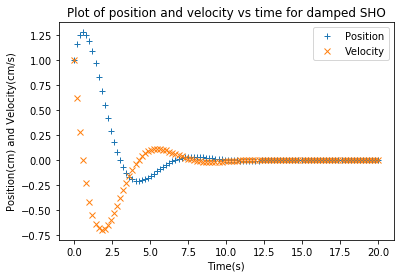

In [10]:
# damped simple harmonic oscillator
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
a,b=1,1; #note the number of parameters here is two 
def dx_dt(x,t):
    return[x[1],-a*x[0]-b*x[1]] #function definition
ts=np.linspace(0,20,100)
x0=[1.0,1.0]
xs=odeint(dx_dt,x0,ts)
position = xs[:,0]
velocity = xs[:,1]
plt.plot(ts,position,"+",label="Position")
plt.plot(ts,velocity,"x",label="Velocity")
plt.xlabel("Time(s)")
plt.ylabel("Position(cm) and Velocity(cm/s)")
plt.title("Plot of position and velocity vs time for damped SHO")
plt.legend();
plt.savefig('Plot of position and velocity vs time for damped SHO.png')
plt.show()

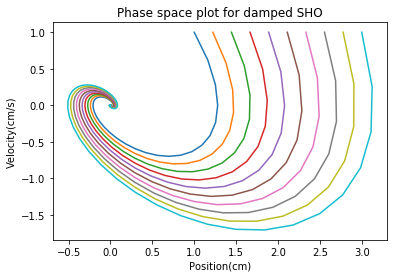

In [11]:
#phase space plot for damped SHO
ic=np.linspace(1.0,3.0,10)
for r in ic:
    x0=[r,1.0]
    xs=odeint(dx_dt,x0,ts)
    plt.plot(xs[:,0],xs[:,1],"-")
plt.xlabel("Position(cm)")
plt.ylabel("Velocity(cm/s)")
plt.title("Phase space plot for damped SHO")
plt.savefig('Phase space plot for damped SHO.png')
plt.show()

### Duffing Oscillator

Duffing oscillator is an example of a periodically forced oscillator with a nonlinear elasticity, written as 
\begin{align}
\ddot{x}+\delta \dot{x} + \beta x + \alpha x^3 = \gamma cos(\omega t)
\end{align}
where the damping constant obeys $\delta \geq 0$ , and it is also known as a simple model which yields chaos. Different values of the co-efficients of the terms in the equation change the nature of the solutions. We tabulate the distinct features of the potential which can be seen by changing the magnitude of the co-efficients in the code give below: 

| $  \alpha > 0  $   |       $\delta > 0$      |   $\delta < 0$   | 
|--------------------|:-----------------------:|-----------------:|
| $  \beta > 0  $    |Conservative Single Well |Damped Single Well|
| $  \beta < 0  $    |Conservative Double Well |Damped Double Well|

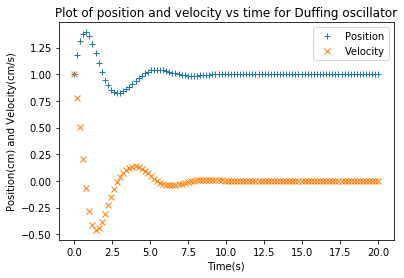

In [12]:
#Duffing oscillator
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
a,b,c,d=1,-1,1,1;#change the sign/magnitude of the coefficients to see the changes in the phase plot
def dx_dt(x,t):
    return[x[1],-a*x[1]-b*x[0]-c*(x[0]**3)]
ts=np.linspace(0,20,100)
x0=[1.0,1.0]
xs=odeint(dx_dt,x0,ts)
position = xs[:,0]
velocity = xs[:,1]
plt.plot(ts,position,"+",label="Position")
plt.plot(ts,velocity,"x",label="Velocity")
plt.xlabel("Time(s)")
plt.ylabel("Position(cm) and Velocity(cm/s)")
plt.title("Plot of position and velocity vs time for Duffing oscillator")
plt.legend();
plt.savefig('Plot of position and velocity vs time for Duffing oscillator.png')
plt.show()

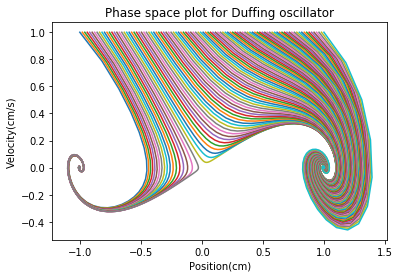

In [14]:
#phase space plot for Duffing Oscillator
ic=np.linspace(-1.0,1.0,100)
for r in ic:
    x0=[r,1.0]
    xs=odeint(dx_dt,x0,ts)
    plt.plot(xs[:,0],xs[:,1],"-")
plt.xlabel("Position(cm)")
plt.ylabel("Velocity(cm/s)")
plt.title("Phase space plot for Duffing oscillator")
plt.savefig('Phase space plot for Duffing oscillator.png')
plt.show()

## Mathematical Physics

The totality of all possible instantaneous states of a physical (in the broad sense of the word) system, provided with a definite structure depending on the system being studied and the questions being considered. More specifically, a phase space is a space (a set with an imposed structure) the elements (phase points) of which represent the states of the system (for example, a phase plane). From a mathematical point of view these objects are [isomorphic](http://mathworld.wolfram.com/Isomorphism.html), and therefore one often does not distinguish between the states and the phase points that represent them.

A mathematical formalization of the concept of a "system" of one type or another usually includes as an essential part the definition of the corresponding phase space (or class of phase spaces), which reflects the importance of the concept of a state of a system. The evolution of a system (that is, the change of its states with time) may be strictly deterministic (then it is described by a group or semi-group {$S_t$} of transformations of the phase space: a state $w$ goes to $S_tw$ at time $t$), or it may have a probabilistic character(be a [stochastic process](https://www.encyclopediaofmath.org/index.php/Stochastic_process). In the first case it may also be necessary to consider statistical states of systems; for classical (non-quantum) systems they are described by probability distributions on the phase space. The rules that determine the evolution of a system constitute another essential part of the definition of a "system" .

In the classical case of a differentiable [dynamical system](https://www.encyclopediaofmath.org/index.php/Dynamical_system) (which includes the main systems considered in analytical mechanics and classical statistical physics), the phase space is a differentiable manifold **M** (possibly with singularities and\or with a boundary). If the dynamical system is given by an [autonomous system](https://www.encyclopediaofmath.org/index.php/Autonomous_system) of ordinary differential equations, then one speaks of the phase space of the autonomous system. In this case **M** is that region of a Euclidean or other space where the right-hand sides of the autonomous system are defined. In such a situation the term "phase space" is also used when the solutions are not defined for all $t$. In addition, there can be given on **M** an invariant measure (classically given by a density) or a symplectic structure (the condition that this is preserved under the action of the flow characterizes a Hamiltonian system). 

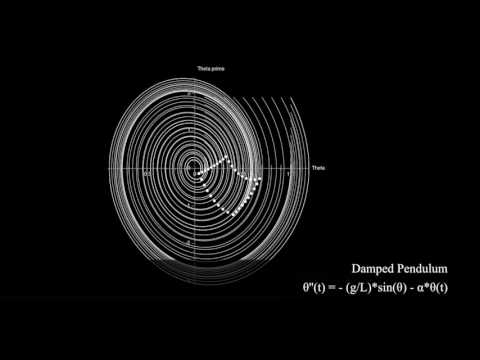

In [17]:
#A video on the significance of spirals in Phase Space
from IPython.display import YouTubeVideo
YouTubeVideo('hpdjvxOT6nE', height=500, width=700)

## Quantum Mechanics

The phase space formulation of quantum mechanics places the position and momentum variables on equal footing, in phase space. In contrast, the Schrödinger picture uses the position or momentum representations (see also position and momentum space). The two key features of the phase space formulation are that the quantum state is described by a [quasiprobability distribution](https://en.wikipedia.org/wiki/Quasiprobability_distribution) (instead of a wave function, state vector, or density matrix) and operator multiplication is replaced by a star product.

The chief advantage of the phase space formulation is that it makes quantum mechanics appear as similar to Hamiltonian mechanics as possible by avoiding the operator formalism, thereby "'freeing' the quantization of the 'burden' of the Hilbert space". This formulation is statistical in nature and offers logical connections between quantum mechanics and classical statistical mechanics, enabling a natural comparison between the two ([classical limit](https://en.wikipedia.org/wiki/Classical_limit)). Quantum mechanics in phase space is often favored in certain quantum optics applications, or in the study of decoherence and a range of specialized technical problems, though otherwise the formalism is less commonly employed in practical situations.

More rigorous discussion can be found in the references listed at the end of this notebook. 

## Statistical Mechanics

Consider an isolated system with N particles (components). The complete description of this system is given by the generalized coordinates:
$q = (q_1, . . . , q_{3N} ),
p = (p_1, . . . , p_{3N} ).$

Phase space is defined as 6N-dimensional space whose points are given by the 6N values of ($q_1, . . . , q_{3N}, p_1, . . . , p_{3N}$ ).
For N particles, the total numbers of degrees of freedom is 6N, and therefore the total phase space is 6N-dimensional. The motion of the particles is governed deterministically by the Hamiltonian:
\begin{align}
H(p,q) = \varSigma^N_{i=1} \frac{\vec{p_i}^2}{2m} + \frac{1}{2}V(\vec{q_i}-\vec{q_j}),
\end{align}
where $V(\vec{q_i}-\vec{q_j})$ is the interparticle potential.The equations of motion of the particles are:
\begin{align}
\dot{p_i} =- \frac{\partial H}{\partial q_i}; 
\dot{q_i} = \frac{\partial H}{\partial p_i}; i=1,...,6N
\end{align}
with specified initial conditions. 

The phase space is also called $\Gamma$-space. A point (representative point) in this space corresponds to a state of the N-body system at a given time, that is, to the microstate of the system. A *trajectory* in the phase space corresponds to the time evolution of the microstate. This trajectory **never intersects with itself** since the solution of the system of equations of motion is unique given certain initial conditions (self-avoiding random walk).
If H does not depend explicitly on time, in which case energy is a conserved quantity, all trajectories in phase space lie on an energy surface which is a hypersurface in $\Gamma$-space.

Note:In $\Gamma$-space the history of an N-particle system is represented by one trajectory on a (6N − 1)-dimensional energy surface.

In general, for systems with one particle in one dimension, the phase trajectory is a closed curve. For d > 1, closed trajectories happen only if there are more conserved quantities than just energy such as, for instance, the Runge-Lenz vector in the Kepler problem.

Most of the popular systems studied in statistical mechanics are  made on the ideal gas system, which is the *low-density* limit of the real gas. In this limit, the atomic interactions contribute very little to the total energy, and therefore the total energy can be approximated by the sum of the energies of the individual atoms. One should note, though, that interactions cannot be completely ignored since they are responsible for the establishment
of thermal equilibrium (through atoms’ collisions). Therefore, the ideal gas can be viewed as the limiting case in which the interaction potential approaches zero.

## Example from theoretical cosmology

Phase space is also used in studies like chaos and theoretical cosmology where different models for dark energy, for example, are compared by the nature of the characteristics of their solutions to see their viability. 
As in, a successful model of dark energy will have a repeller or source of the solutions, saddle points which pull the solutions towards it and then pushes it towards the late-time attractor(sink) that pulls the solutions towards it. An example of this kind is the following figure which is a plot of potential energy(y-axis) versus kinetic energy(x-axis) for the potential $V(\phi) = V_0 e^{-\lambda \phi}$ where $V_0, \lambda$ are constants. 

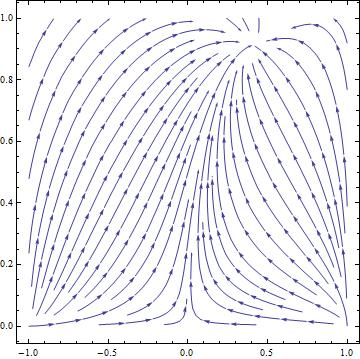

In [18]:
from IPython.display import Image
Image(filename="SteamPlot for lambda=1 w=0 gamma=1.jpg", width=500, height=100)

In [1]:
#One of the first papers to do a stability analysis of a dark energy quintessence model, the above figure 
#is reproduced following this paper
from IPython.display import IFrame
IFrame(src="https://arxiv.org/abs/gr-qc/9711068", width=990, height=400)

# Interesting Reads

- [Phase space in Encyclopedia of Math](https://www.encyclopediaofmath.org/index.php/Phase_space) 

- [Statistical mechanics of phase-space curves,M. Rocca, A. Plastino, G. L. Ferri,1306.2034v1 [cond-mat.stat-mech] 9 Jun 2013](https://arxiv.org/pdf/1306.2034.pdf)

- [Quantum mechanics in phase space,T.L. Curtright,C.K. Zachos,1104.5269v2 [physics.hist-ph] 26 Dec 2011](https://arxiv.org/pdf/1104.5269.pdf)

- [Phase space quantum mechanics,M. Blaszak, Z. Domanski,1009.0150v2 [math-ph] 26 Sep 2011](https://arxiv.org/pdf/1009.0150.pdf)